In [1]:
%matplotlib inline

# Plotting utilities

Author: Ilya Kisil (<ilyakisil@gmail.com>)

In [2]:
import numpy as np
import tensorly as tl
import matplotlib.pyplot as plt
from scipy import signal
from tensorly.decomposition import parafac
from tensorly.contrib.visualisation import plot_kruskal_factors, plot_tucker_factors

Using numpy backend.


In [3]:
def bar_plot(ax, data):
    """ Sample custom plot function """
    ax.bar(x=range(data.shape[0]), height=data)

## Plotting factor matrices obtained through tensor decomposition

Plotting logic is the same for PARAFAC and Tucker decompositions. However, selection of which components will be plotted is slightly different.

Despite the employed tensor decomposition, all plots within the same column are of the same type, e.g line plot. Each column represents factor vectors from different modes. Each row represents factor vectors that are linked through the core tensor.

In [4]:
tensor = tl.tensor(np.arange(60).reshape((3, 4, 5)))
cpd_rank = 50
factors = parafac(tensor, rank=cpd_rank, n_iter_max=200, init='svd', tol=10e-5)

print("Original tensor of shape = {}".format(tensor.shape))
print("Rank of the CPD = {}".format(cpd_rank))
for mode, factor in enumerate(factors):
    print("Mode-{} factor matrix shape = {}".format(mode, factor.shape))

Original tensor of shape = (3, 4, 5)
Rank of the CPD = 50
Mode-0 factor matrix shape = (3, 50)
Mode-1 factor matrix shape = (4, 50)
Mode-2 factor matrix shape = (5, 50)


There are 50 possible combinations of factor vectors that can be plotted.
By default, up to first 5 components from each factor matrix are plotted.

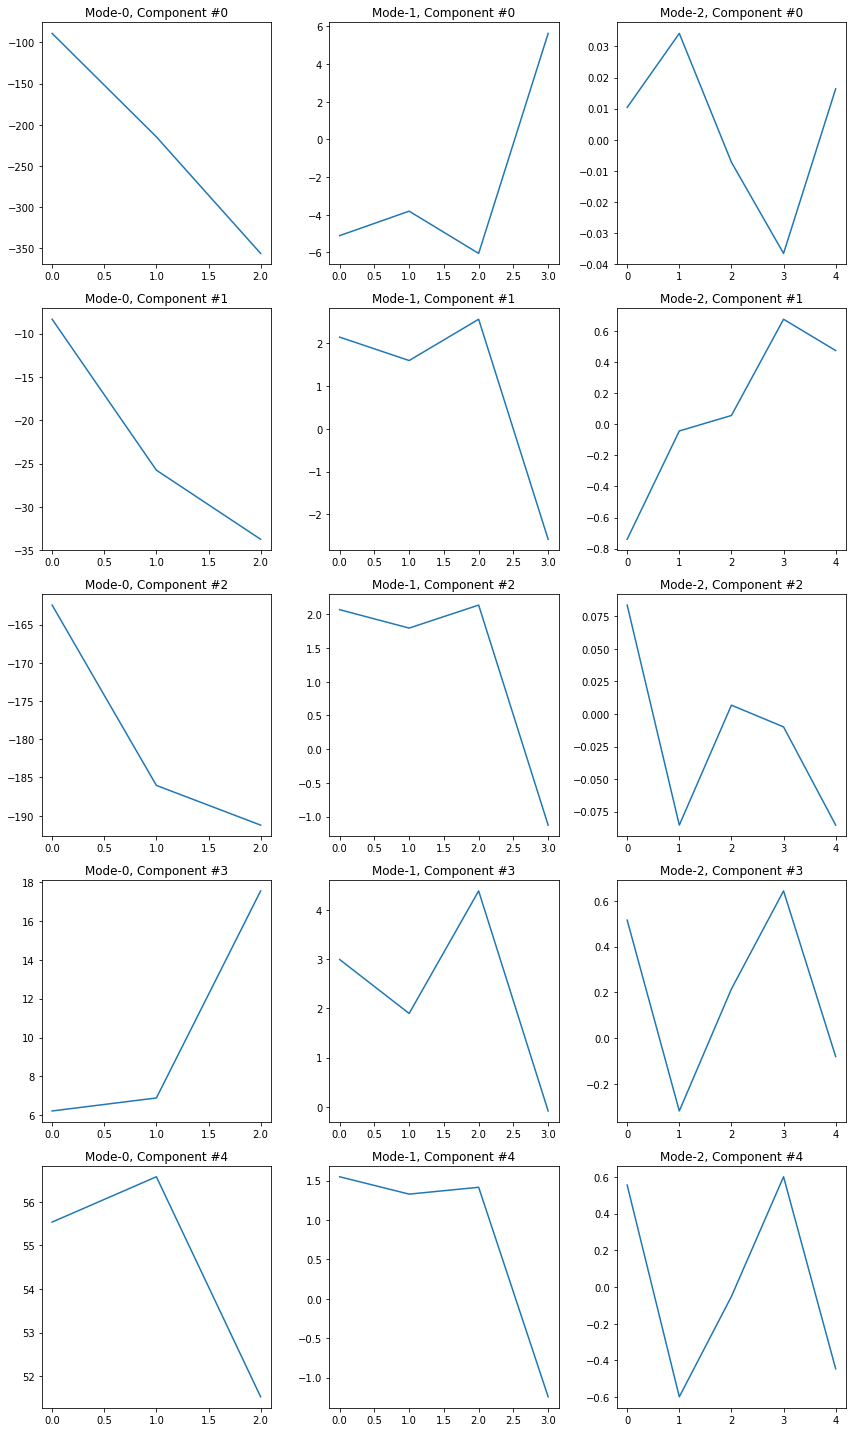

In [5]:
fig, axis = plot_kruskal_factors(factors)

This number can be increased or decreased by setting optional parameter `max_default_length`.

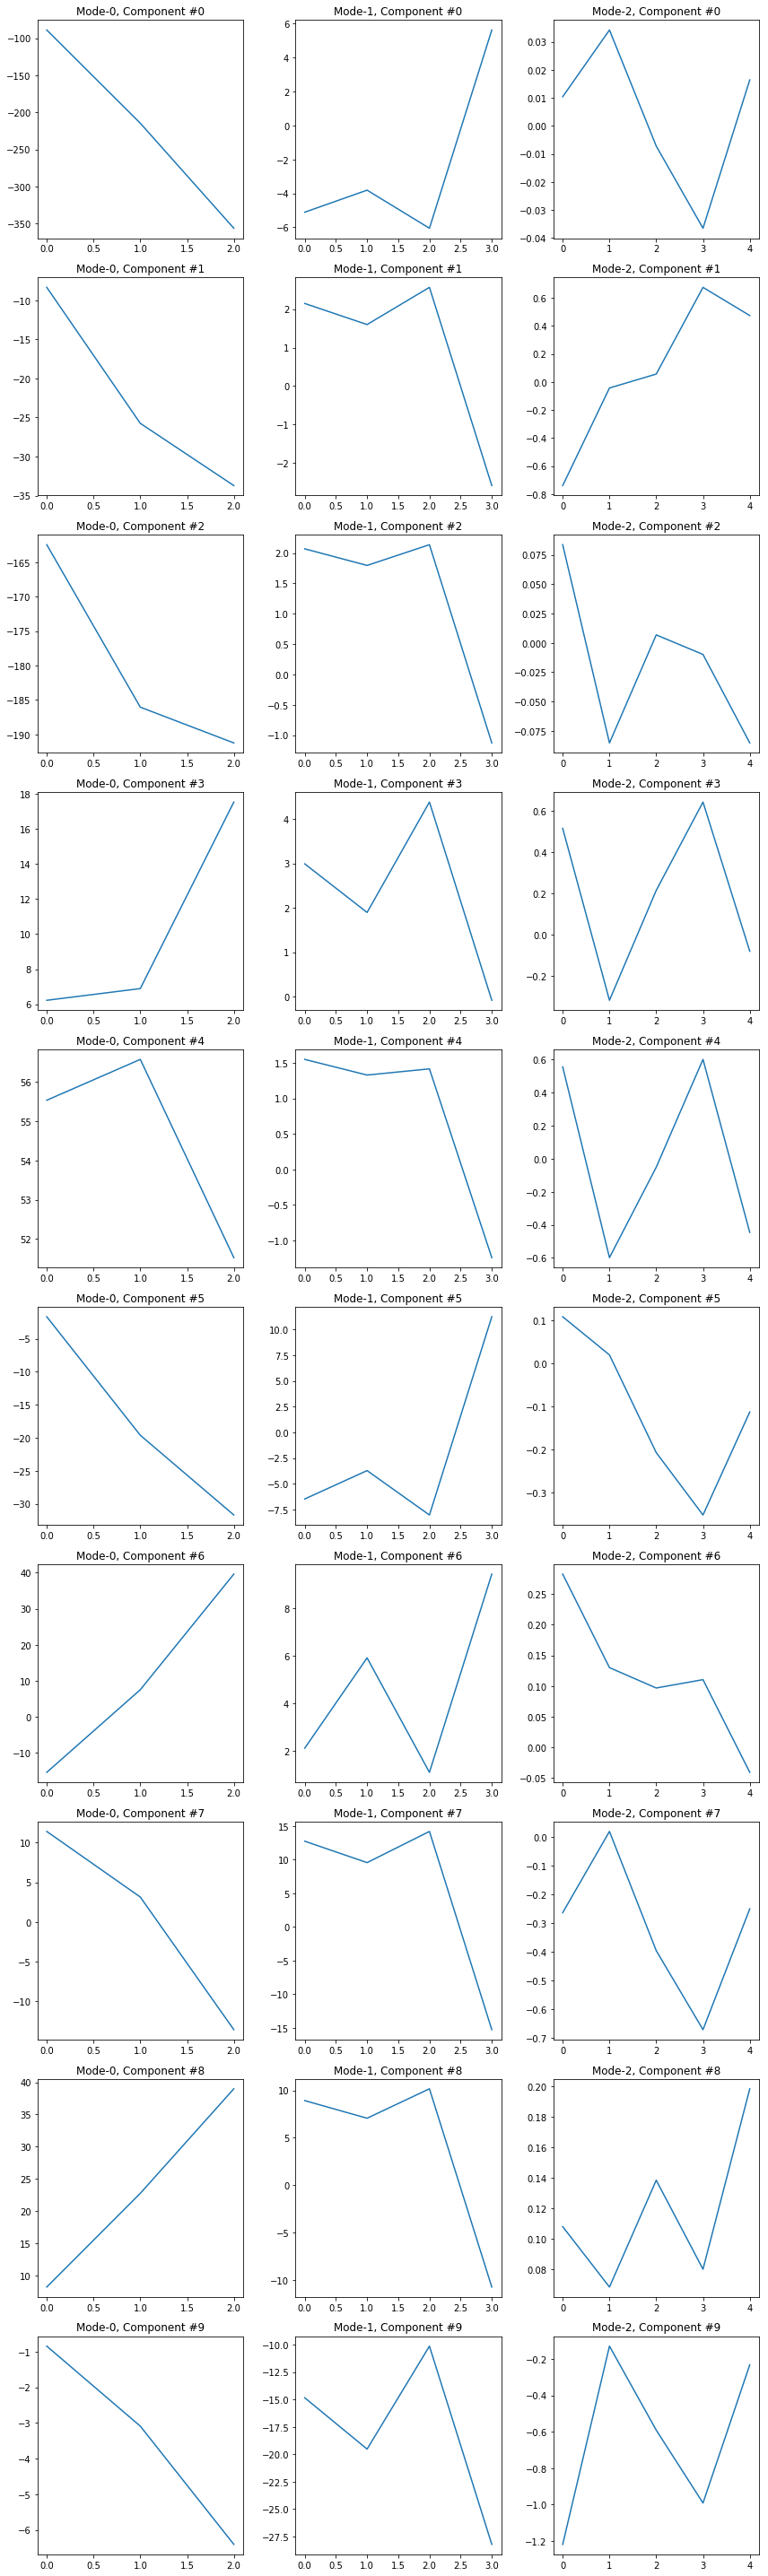

In [6]:
fig, axis = plot_kruskal_factors(factors,
                                 max_default_length=8)

Alternatively, we can plot specific compoenents by passing them as a list to ``components``.
Note: in this case, ``max_default_length`` will be suppressed.

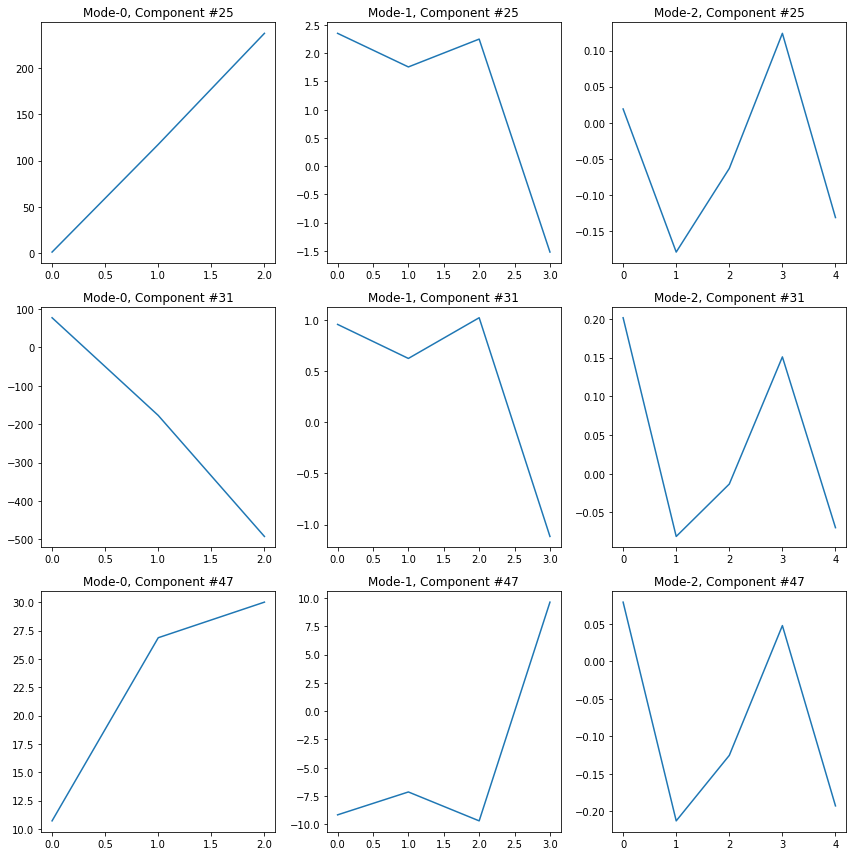

In [7]:
fig, axis = plot_kruskal_factors(factors,
                                 components=[25, 31, 47])

By default, each component is illystrated by the line plot, which comes with ``visualisation`` module. In order to change this, one can define a custom plotting function and pass it in a dictionary where key specifies to which mode it should be applied.
```python
def bar_plot(ax, data):  # the signature must look like this
    """ Sample custom plot function """
    ax.bar(x=range(data.shape[0]), height=data)

fig, axis = plot_kruskal_factors(factors, custom_plots={1: bar_plot})
```


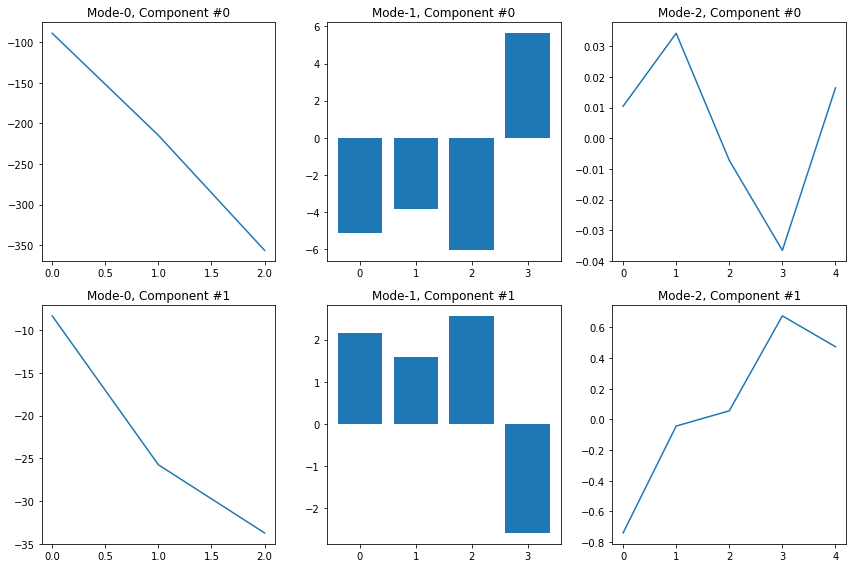

In [8]:
fig, axis = plot_kruskal_factors(factors,
                                 custom_plots={1: bar_plot},
                                 max_default_length=2)

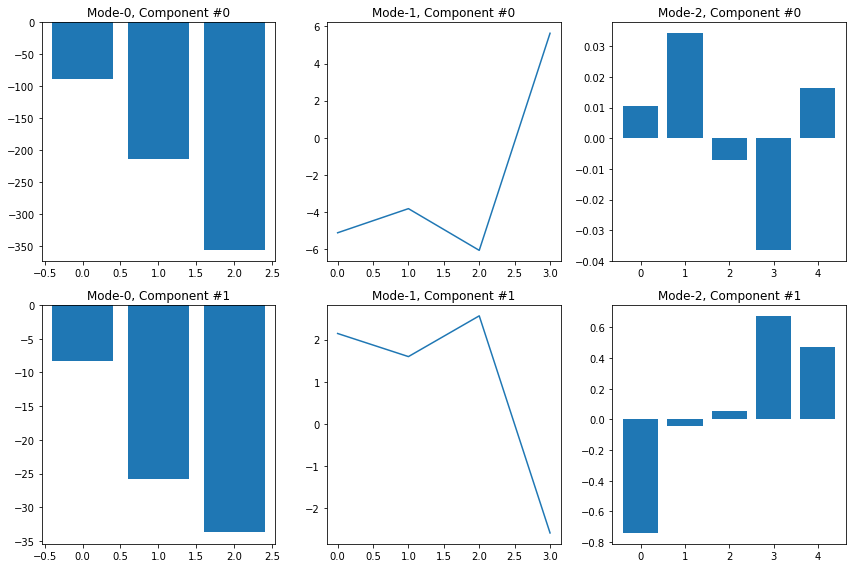

In [9]:
fig, axis = plot_kruskal_factors(factors,
                                 custom_plots={0: bar_plot, 2: bar_plot},
                                 max_default_length=2)

## Plotting synthetic factor matrices

Let's generate some factor matrices which components will be easy to differentiate from one another.

Mode-0 factor matrix shape = (500, 3)
Mode-1 factor matrix shape = (10, 3)
Mode-2 factor matrix shape = (200, 3)


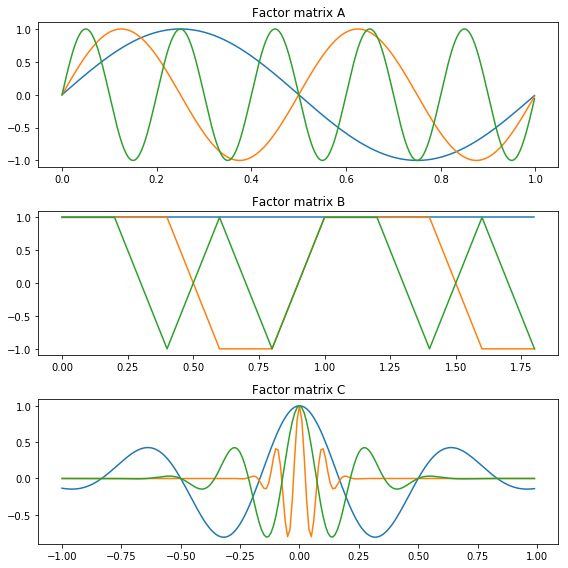

In [10]:
t_A = np.linspace(0, 1, 500, endpoint=False).reshape(-1, 1)
t_B = np.linspace(0, 2, 10, endpoint=False).reshape(-1, 1)
t_C = np.linspace(-1, 1, 2 * 100, endpoint=False).reshape(-1, 1)
w_A = np.array([1, 2, 5]).reshape(-1, 1)
w_B = np.roll(w_A, 1)
w_C = np.array([0.3, 2, 0.7]).reshape(-1, 1)

A = np.sin         (2 * np.pi * t_A * w_A.T)
B = signal.square  (2 * np.pi * t_B * w_B.T)
C, _, _ = signal.gausspulse(t_C * w_C.T, fc=5, retquad=True, retenv=True)

factors = [A, B, C]
for mode, factor in enumerate(factors):
    print("Mode-{} factor matrix shape = {}".format(mode, factor.shape))
fig, axis = plt.subplots(nrows=3,
                         ncols=1,
                         figsize=(8, 8)
                         )
axis[0].plot(t_A, A)
axis[0].set_title("Factor matrix A")
axis[1].plot(t_B, B)
axis[1].set_title("Factor matrix B")
axis[2].plot(t_C, C)
axis[2].set_title("Factor matrix C")
plt.tight_layout()

### If factor matrices came from CPD

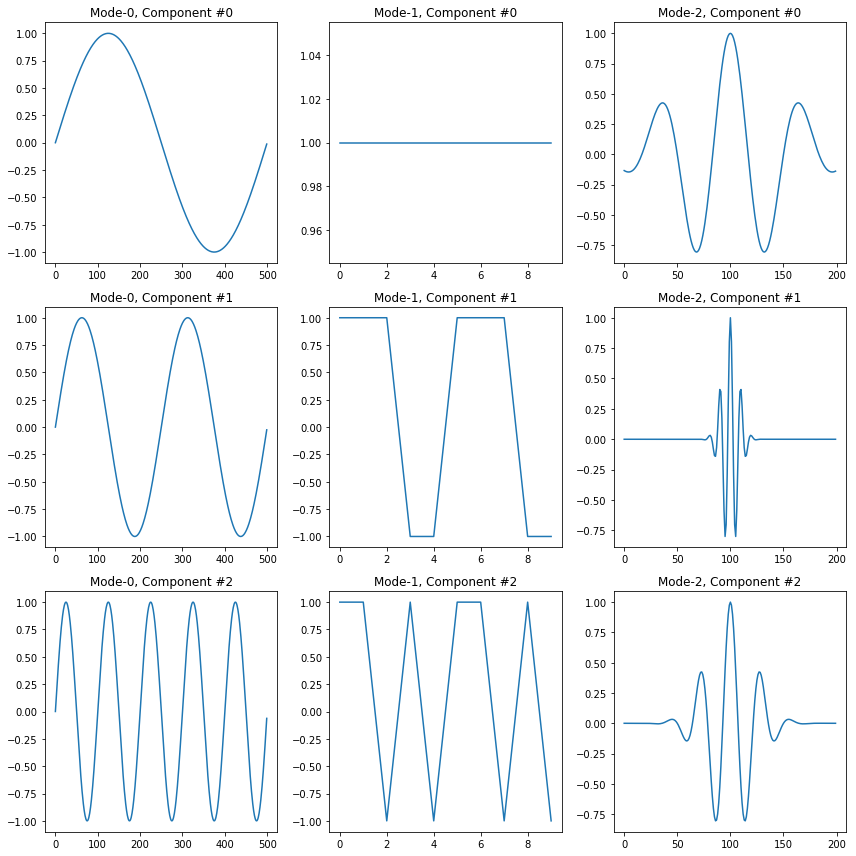

In [11]:
fig, axis = plot_kruskal_factors(factors)

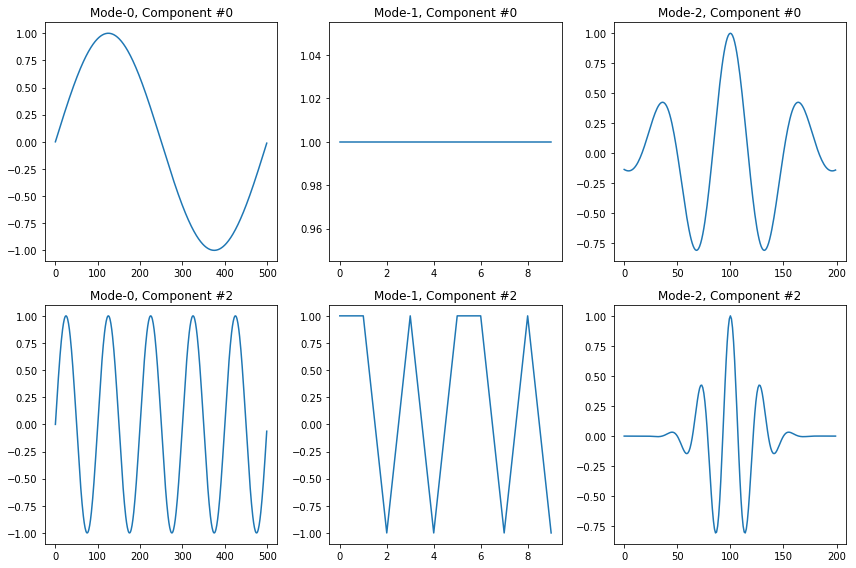

In [12]:
fig, axis = plot_kruskal_factors(factors, components=[0, 2])

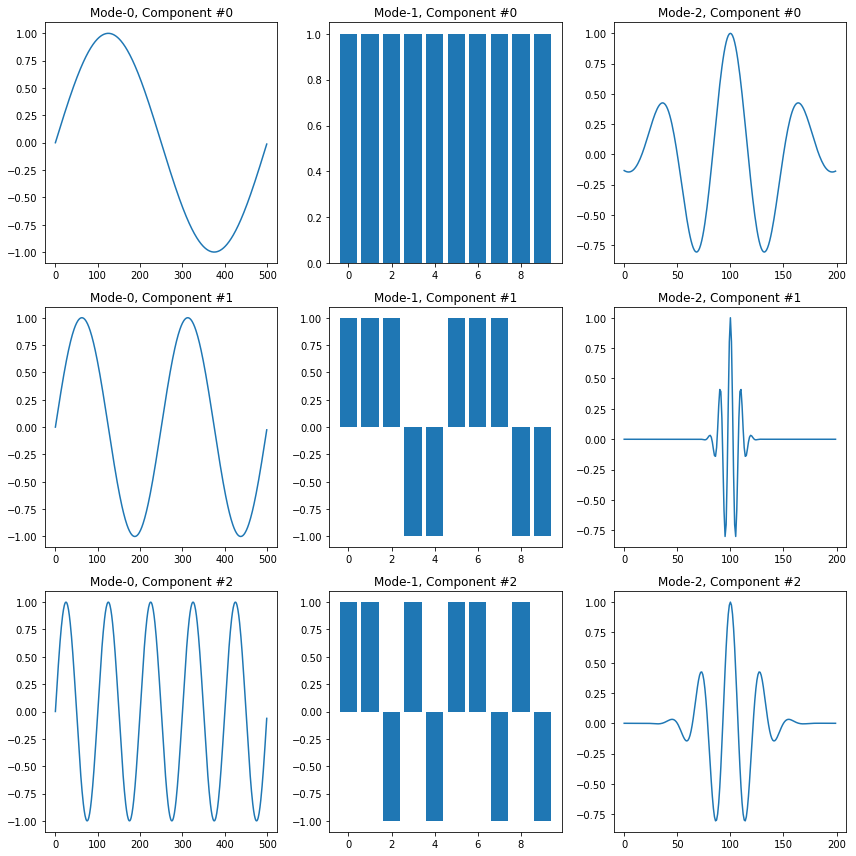

In [13]:
fig, axis = plot_kruskal_factors(factors, custom_plots={1: bar_plot})

### If factor matrices came from Tucker decomposition

By default only the first factor vector from each factor matrix is plotted

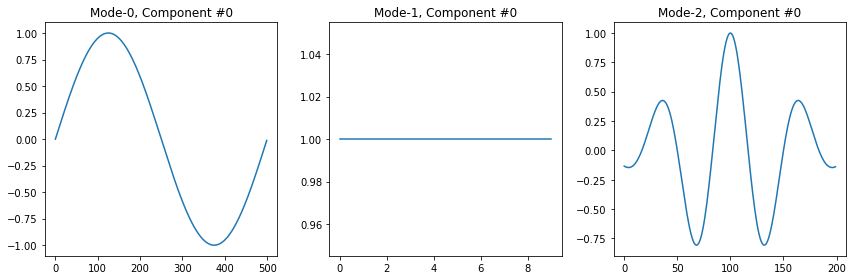

In [14]:
fig, axis = plot_tucker_factors(factors)

The same logic for changing plot types as in kruskal case 

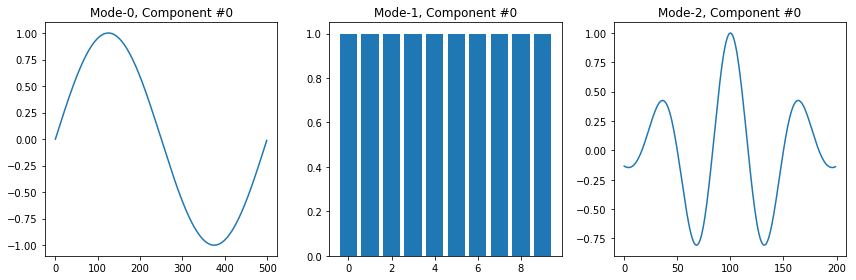

In [15]:
fig, axis = plot_tucker_factors(factors, custom_plots={1: bar_plot})

Different way of selections which components to plot

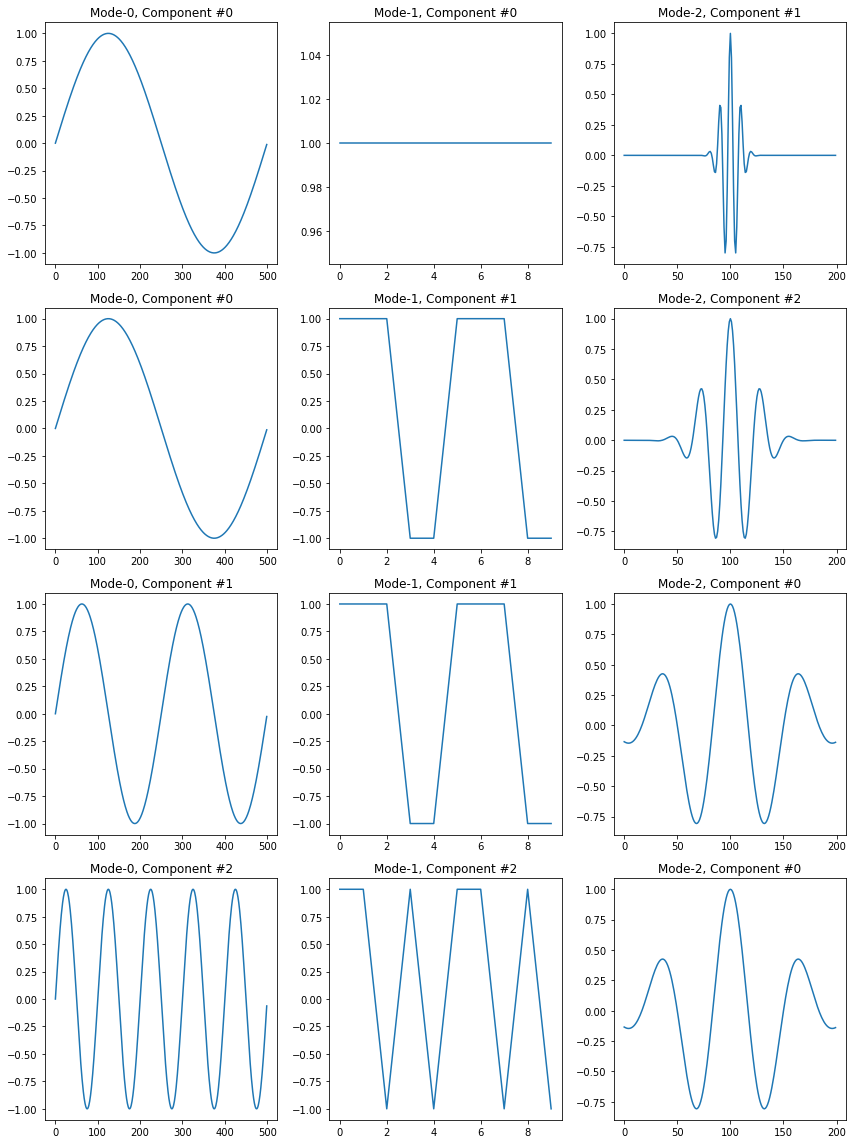

In [16]:
factor_vectors_combinations = [(0, 0, 1),
                               (0, 1, 2),
                               (1, 1, 0),
                               (2, 2, 0),
                              ]
fig, axis = plot_tucker_factors(factors, combinations=factor_vectors_combinations)